In [1]:
# !pip install --upgrade opencv-python==4.1.2
import pandas as pd
%cd yolov5
import torch
from IPython.display import Image, clear_output  # to display images

clear_output()
print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

device = "cuda" if torch.cuda.is_available() else "cpu" # ЗДЕСЬ ВАШ КОД
print(f'device: {device}')

Setup complete. Using torch 1.7.1+cu101 (GeForce RTX 2070)
device: cuda


In [2]:
# Tensorboard  (optional)
%load_ext tensorboard
%tensorboard --logdir runs/train

# Weights & Biases  (optional)
%pip install -q wandb

import wandb
wandb.login()

Launching TensorBoard...

Note: you may need to restart the kernel to use updated packages.


wandb: Currently logged in as: maxinstellar (use `wandb login --relogin` to force relogin)


True

In [3]:
# Train YOLOv5s on COCO128 for 3 epochs
!python train.py --img 704 --batch 5 --epochs 150 \
        --data ../datasets/Nornickel/Nornickel.yaml \
        --weights yolov5x.pt

train: weights=yolov5x.pt, cfg=, data=../datasets/Nornickel/Nornickel.yaml, hyp=data/hyps/hyp.scratch.yaml, epochs=150, batch_size=5, img_size=[704], rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, evolve=None, bucket=, cache_images=False, image_weights=False, device=, multi_scale=False, single_cls=False, adam=False, sync_bn=False, workers=8, project=runs/train, entity=None, name=exp, exist_ok=False, quad=False, linear_lr=False, label_smoothing=0.0, upload_dataset=False, bbox_interval=-1, save_period=-1, artifact_alias=latest, local_rank=-1
remote: Enumerating objects: 119, done.
remote: Counting objects: 100% (114/114), done.
remote: Compressing objects: 100% (44/44), done.
remote: Total 119 (delta 81), reused 96 (delta 70), pack-reused 5
Receiving objects: 100% (119/119), 300.88 KiB | 2.20 MiB/s, done.
Resolving deltas: 100% (81/81), completed with 27 local objects.
From https://github.com/ultralytics/yolov5
   f7d8562..0cc7c58  master                  -> ori

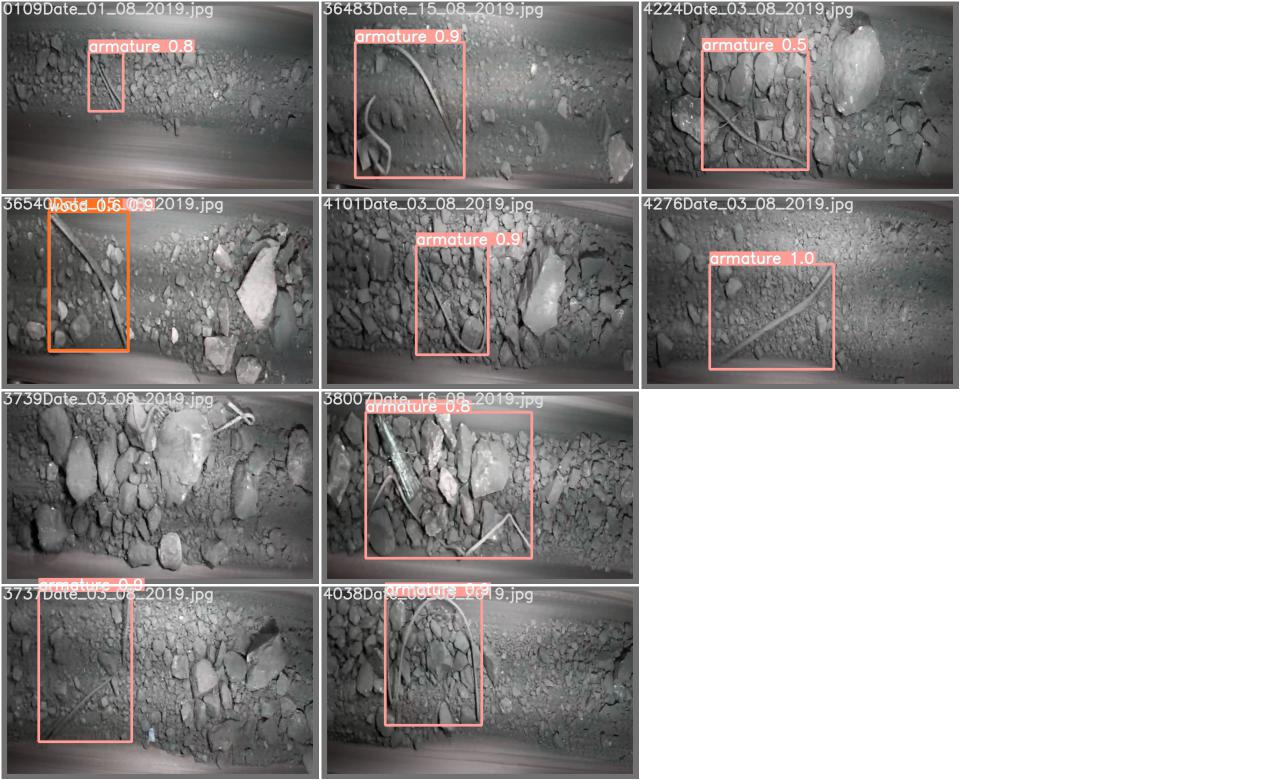

In [3]:
Image(filename='runs/train/exp3/train_batch0.jpg', width=704)  # train batch 0 mosaics and labels
Image(filename='runs/train/exp3/val_batch0_labels.jpg', width=704)  # val batch 0 labels
Image(filename='runs/train/exp3/val_batch0_pred.jpg', width=704)  # val batch 0 predictions

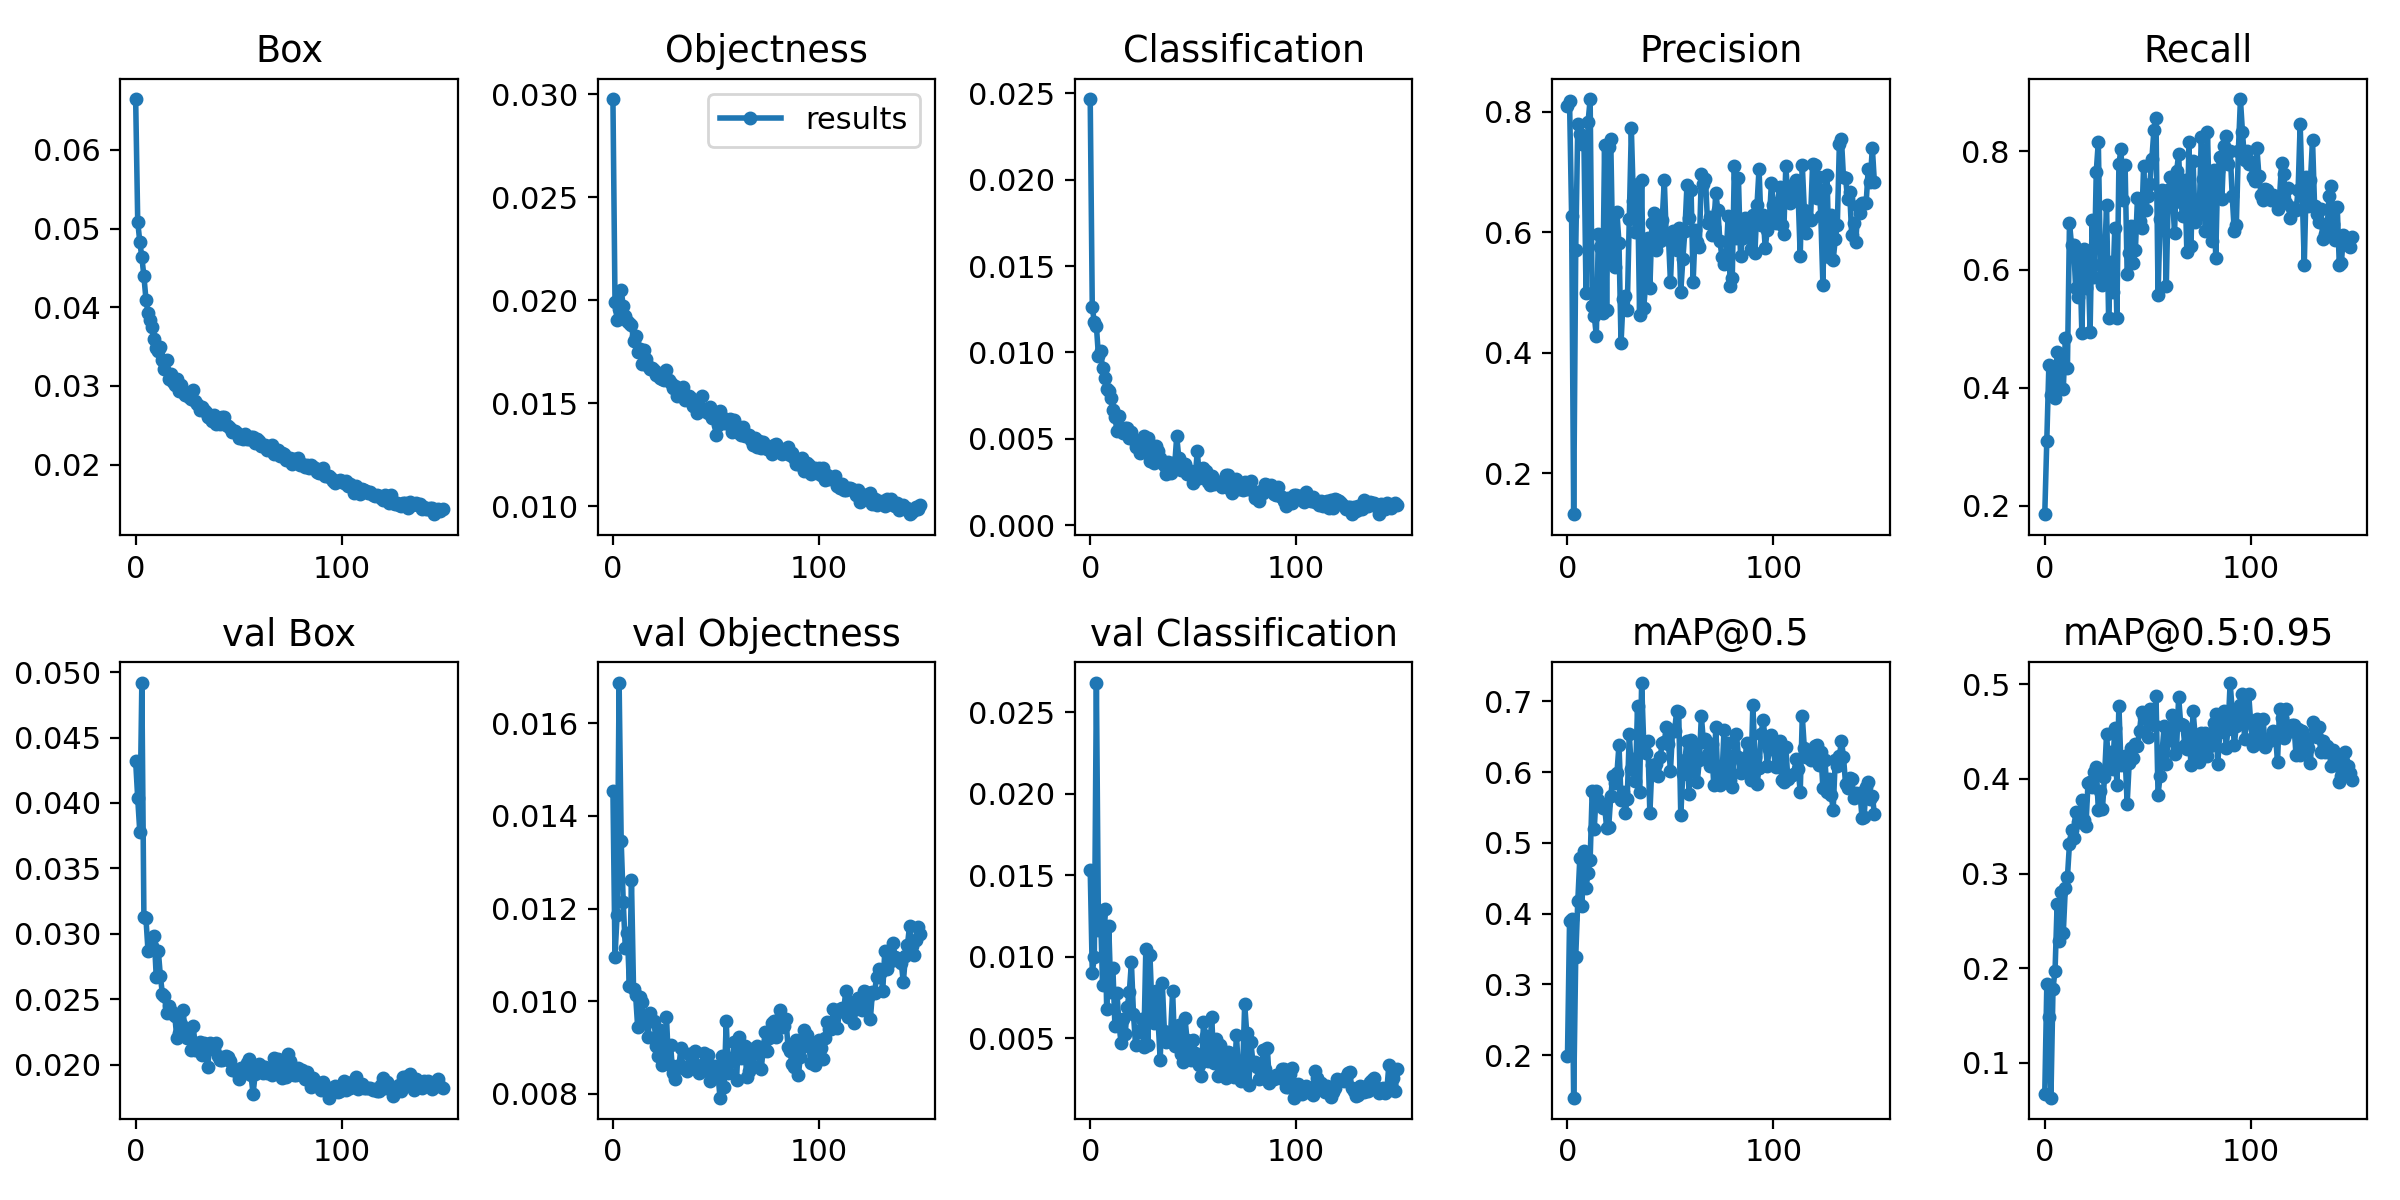

In [4]:
from utils.plots import plot_results
plot_results(save_dir='runs/train/exp3')  # plot all results*.txt files in 'runs/train/exp'
Image(filename='runs/train/exp3/results.png', width=704)

In [7]:
# Reproduce
# for x in 'yolov5s', 'yolov5m', 'yolov5l', 'yolov5x':
#   !python val.py --weights {x}.pt --data ../datasets/Nornickel/Nornickel.yaml --img 704 --conf 0.25 --iou 0.45  # speed
#   !python val.py --weights {x}.pt --data ../datasets/Nornickel/Nornickel.yaml --img 704 --conf 0.001 --iou 0.65  # mAP

val: data=../datasets/Nornickel/Nornickel.yaml, weights=['yolov5s.pt'], batch_size=32, imgsz=704, conf_thres=0.25, iou_thres=0.45, task=val, device=, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False
YOLOv5 🚀 v5.0-293-g0067d95 torch 1.7.1+cu101 CUDA:0 (GeForce RTX 2070, 7979.1875MB)

Fusing layers... 
Model Summary: 224 layers, 7266973 parameters, 0 gradients
val: Scanning '../datasets/Nornickel/labels/valid.cache' images and labels... 18
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all        189          0          0          0          0          0
Speed: 0.1ms pre-process, 4.4ms inference, 0.9ms NMS per image at shape (32, 3, 704, 704)
Results saved to runs/val/exp10
val: data=../datasets/Nornickel/Nornickel.yaml, weights=['yolov5s.pt'], batch_size=32, imgsz=704, conf_thres=0.001, iou_thres=0.65, task=val, dev

KeyboardInterrupt: 

In [5]:
!python val.py --weights '/home/maksim/projects/Nornickel-Ore-Contamination-Detection/yolov5/runs/train/exp3/weights/best.pt' \
    --data ../datasets/Nornickel/Nornickel.yaml \
    --img 704 --conf 0.25 --iou 0.45  # speed

val: data=../datasets/Nornickel/Nornickel.yaml, weights=['/home/maksim/projects/Nornickel-Ore-Contamination-Detection/yolov5/runs/train/exp3/weights/best.pt'], batch_size=32, imgsz=704, conf_thres=0.25, iou_thres=0.45, task=val, device=, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False
YOLOv5 🚀 v5.0-293-g0067d95 torch 1.7.1+cu101 CUDA:0 (GeForce RTX 2070, 7979.1875MB)

Fusing layers... 
Model Summary: 476 layers, 87212152 parameters, 0 gradients, 217.1 GFLOPs
val: Scanning '../datasets/Nornickel/labels/valid.cache' images and labels... 18
val: Scanning '../datasets/Nornickel/labels/valid.cache' images and labels... 18

               Class     Images     Labels          P          R     mAP@.5 mAP@
               Class     Images     Labels          P          R     mAP@.5 mAP@
               Class     Images     Labels          P          R     mAP@.5 mAP@
       

In [6]:
!python val.py --weights '/home/maksim/projects/Nornickel-Ore-Contamination-Detection/yolov5/runs/train/exp3/weights/best.pt' \
    --data ../datasets/Nornickel/Nornickel.yaml --img 704 --conf 0.001 --iou 0.65  # mAP

val: data=../datasets/Nornickel/Nornickel.yaml, weights=['/home/maksim/projects/Nornickel-Ore-Contamination-Detection/yolov5/runs/train/exp3/weights/best.pt'], batch_size=32, imgsz=704, conf_thres=0.001, iou_thres=0.65, task=val, device=, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False
YOLOv5 🚀 v5.0-293-g0067d95 torch 1.7.1+cu101 CUDA:0 (GeForce RTX 2070, 7979.1875MB)

Fusing layers... 
Model Summary: 476 layers, 87212152 parameters, 0 gradients, 217.1 GFLOPs
val: Scanning '../datasets/Nornickel/labels/valid.cache' images and labels... 18
val: Scanning '../datasets/Nornickel/labels/valid.cache' images and labels... 18

               Class     Images     Labels          P          R     mAP@.5 mAP@
               Class     Images     Labels          P          R     mAP@.5 mAP@
               Class     Images     Labels          P          R     mAP@.5 mAP@
      

In [7]:
# PyTorch Hub
import os
import cv2
import torch
from models.experimental import attempt_load

# model = torch.load('./runs/train/exp/weights/best.pt') # torch.hub.load('ultralytics/yolov5', 'yolov5s')
weights = './runs/train/exp3/weights/best.pt'
model = attempt_load(weights, map_location=device)  # load FP32 model)
# model

# Images
dir = '/home/maksim/projects/Nornickel-Ore-Contamination-Detection/datasets/Nornickel/images/test/'  # 'https://github.com/ultralytics/yolov5/raw/master/data/images/'
imgs = [dir + f for f in os.listdir(dir)]  # [dir + f for f in ('zidane.jpg', 'bus.jpg')]  # batch of images
print(imgs[:3])

import numpy as np
## Inference
image = cv2.imread(imgs[0])
ht, wd, cc = image.shape
ww, hh = 704, 704
color = (0, 0, 0)
padded_image = np.full((hh, ww, cc), color, dtype=np.uint8)
# compute center offset
xx = (ww - wd) // 2
yy = (hh - ht) // 2
# copy img image into center of result image
padded_image[yy:yy + ht, xx:xx + wd] = image
# image = cv2.resize(image, (704, 640))
image = torch.tensor(padded_image, dtype=torch.float)
image = image.unsqueeze(0)
image = image.permute(0,3,1,2)
image = image.to(device)
print(image.dtype)
results = model(image)
# results #.print()  # or .show(), .save()

['/home/maksim/projects/Nornickel-Ore-Contamination-Detection/datasets/Nornickel/images/test/12795Date_06_08_2019.jpg', '/home/maksim/projects/Nornickel-Ore-Contamination-Detection/datasets/Nornickel/images/test/3745Date_03_08_2019.jpg', '/home/maksim/projects/Nornickel-Ore-Contamination-Detection/datasets/Nornickel/images/test/32765Date_13_08_2019.jpg']
torch.float32


In [8]:
from detect import get_bboxes_predicts

result, names = get_bboxes_predicts(
    weights='/home/maksim/projects/Nornickel-Ore-Contamination-Detection/yolov5/runs/train/exp3/weights/best.pt',
    source='/home/maksim/projects/Nornickel-Ore-Contamination-Detection/data/images/all_images',
    imgsz=704,
    name='exp3')

print(names)

YOLOv5 🚀 v5.0-293-g0067d95 torch 1.7.1+cu101 CUDA:0 (GeForce RTX 2070, 7979.1875MB)

Fusing layers... 


!!!!!! weights : /home/maksim/projects/Nornickel-Ore-Contamination-Detection/yolov5/runs/train/exp3/weights/best.pt


Model Summary: 476 layers, 87212152 parameters, 0 gradients, 217.1 GFLOPs


names = ['other', 'armature', 'wood']
image 1/3837 /home/maksim/projects/Nornickel-Ore-Contamination-Detection/data/images/all_images/0000Date_01_08_2019.jpg: !!! new_shape = (704, 704)
image 2/3837 /home/maksim/projects/Nornickel-Ore-Contamination-Detection/data/images/all_images/0007Date_01_08_2019.jpg: !!! new_shape = (704, 704)
image 3/3837 /home/maksim/projects/Nornickel-Ore-Contamination-Detection/data/images/all_images/0013Date_01_08_2019.jpg: !!! new_shape = (704, 704)
image 4/3837 /home/maksim/projects/Nornickel-Ore-Contamination-Detection/data/images/all_images/0016Date_01_08_2019.jpg: !!! new_shape = (704, 704)
image 5/3837 /home/maksim/projects/Nornickel-Ore-Contamination-Detection/data/images/all_images/0019Date_01_08_2019.jpg: !!! new_shape = (704, 704)
image 6/3837 /home/maksim/projects/Nornickel-Ore-Contamination-Detection/data/images/all_images/0020Date_01_08_2019.jpg: !!! new_shape = (704, 704)
image 7/3837 /home/maksim/projects/Nornickel-Ore-Contamination-Detection/d

In [9]:
result
# result

{'/home/maksim/projects/Nornickel-Ore-Contamination-Detection/data/images/all_images/0000Date_01_08_2019.jpg': [{'gn': tensor([704, 421, 704, 421]),
   'det': tensor([[174.,  82., 404., 384.]], device='cuda:0'),
   'det2': tensor([[0.95673, 1.00000]], device='cuda:0'),
   'detections_per_class': tensor(1, device='cuda:0'),
   'xywh': []}],
 '/home/maksim/projects/Nornickel-Ore-Contamination-Detection/data/images/all_images/0007Date_01_08_2019.jpg': [{'gn': tensor([704, 421, 704, 421]),
   'det': tensor([[294.,  78., 326., 280.]], device='cuda:0'),
   'det2': tensor([[0.42149, 1.00000]], device='cuda:0'),
   'detections_per_class': tensor(1, device='cuda:0'),
   'xywh': []}],
 '/home/maksim/projects/Nornickel-Ore-Contamination-Detection/data/images/all_images/0013Date_01_08_2019.jpg': [{'gn': tensor([704, 421, 704, 421]),
   'det': tensor([[196., 109., 558., 253.]], device='cuda:0'),
   'det2': tensor([[0.92124, 1.00000]], device='cuda:0'),
   'detections_per_class': tensor(1, device='c

In [18]:
# real_names = ['other', 'armature', 'wood']
# real_names = {0: 2, 1: 0, 2: 1}  # 0 1 2 -> 2 0 1
int_to_typename = {0: 'other', 1: 'armature', 2: 'wood'}  # ['other', 'armature', 'wood']

In [17]:
import pickle

print(len(result))

with open('result.pickle', 'wb') as handle:
    pickle.dump(result, handle, protocol=pickle.HIGHEST_PROTOCOL)

3837


In [21]:
result_df = {'image_name': [], 'type': [],
             'xmin': [], 'xmax': [], 'ymin': [], 'ymax': []}

for path, predicts in result.items():
    image_name = path.split('/')[-1]
    #uncovered_classes = set(['other', 'armature', 'wood'])
    for elem in predicts:
        if 'det' in elem.keys():
            detections_per_class = elem['detections_per_class'].detach().cpu().numpy().tolist()
            for i in range(detections_per_class):
                confidence, type = elem['det2'].detach().cpu().numpy().tolist()[i]
                # type = real_names[int(type)]
                type = int_to_typename[type]
                image_name_with_type = f'{image_name}_{type}'
                coords = list(map(int, elem['det'].detach().cpu().numpy().tolist()[i]))
                xmin, ymin, xmax, ymax = coords
                result_df['image_name'].append(image_name)
                result_df['type'].append(type)
                result_df['xmin'].append(xmin)
                result_df['xmax'].append(xmax)
                result_df['ymin'].append(ymin)
                result_df['ymax'].append(ymax)
                # if type in uncovered_classes:
                #     uncovered_classes.remove(type)
        else:
            for type in uncovered_classes:
                image_name = f'{image_name}_{type}'
                result_df['image_name'].append(image_name)
                result_df['type'].append(type)
                result_df['xmin'].append(0)
                result_df['xmax'].append(0)
                result_df['ymin'].append(0)
                result_df['ymax'].append(0)


result_df = pd.DataFrame(data=result_df)
print(result_df.shape)
result_df.head()

(4317, 6)


,image_name,type,xmin,xmax,ymin,ymax
0,0000Date_01_08_2019.jpg,armature,174,82,404,384
1,0007Date_01_08_2019.jpg,armature,294,78,326,280
2,0013Date_01_08_2019.jpg,armature,196,109,558,253
3,0016Date_01_08_2019.jpg,armature,172,10,325,362
4,0019Date_01_08_2019.jpg,armature,16,155,274,239


In [22]:
result_df.tail(15)

,image_name,type,xmin,xmax,ymin,ymax
4302,9933Date_05_08_2019.jpg,armature,0,187,68,261
4303,9934Date_05_08_2019.jpg,armature,147,100,437,388
4304,9936Date_05_08_2019.jpg,armature,157,2,273,286
4305,9936Date_05_08_2019.jpg,armature,334,152,368,277
4306,9940Date_05_08_2019.jpg,armature,255,100,509,402
4307,9942Date_05_08_2019.jpg,armature,522,68,703,394
4308,9946Date_05_08_2019.jpg,armature,40,0,293,218
4309,9954Date_05_08_2019.jpg,armature,84,230,229,270
4310,9965Date_05_08_2019.jpg,armature,147,5,285,397
4311,9974Date_05_08_2019.jpg,armature,137,201,230,360


In [23]:
len(set(result_df['image_name'].tolist())) == len(result_df['image_name'].tolist())

False

In [30]:
from tqdm import tqdm
from tools.tools import EncodedPixels

suka = {'Image_name_Type': [], 'EncodedPixels': []}
submission_df_result = pd.DataFrame(data={'Image_name_Type': [],
                                          'EncodedPixels': []})

for index, row in tqdm(result_df.iterrows()):
    uncovered_classes = set(['other', 'armature', 'wood'])
    image_filename = row['image_name']
    object_type = row['type']
    image_filename_with_type = f'{image_filename}_{object_type}'
    if object_type in uncovered_classes:
        uncovered_classes.remove(object_type)
    result = EncodedPixels(result_df, image_filename, object_type)
    # print(result)
    # print()
    if result == '':
        result = '1 1'
    submission_df_result = submission_df_result.append({'Image_name_Type': row['image_name'],
                                 'EncodedPixels': result}, ignore_index=True)
    for type in uncovered_classes:
        result = '1 1'
        image_filename = image_filename.split('_')[:-1]
        image_filename = '_'.join(image_filename)
        image_filename = f'{image_filename}_{type}'
        submission_df_result = submission_df_result.append({'Image_name_Type': image_filename,
                                 'EncodedPixels': result}, ignore_index=True)

4317it [08:40,  8.29it/s]


In [31]:
print(submission_df_result.shape)
submission_df_result.tail(15)
submission_df_result.to_csv('yolov5_submission.csv', index=False)

(12951, 2)


In [32]:
len(set(submission_df_result['Image_name_Type'].tolist()))

11758

In [28]:
sample_submission = pd.read_csv('/home/maksim/projects/Nornickel-Ore-Contamination-Detection/data/sampleSubmission.csv',
                                index_col=None)
print(sample_submission.shape)
sample_submission.head(3)

(4605, 2)


,Image_name_Type,EncodedPixels
0,0000Date_01_08_2019.jpg_armature,1 1
1,0000Date_01_08_2019.jpg_other,1 1
2,0000Date_01_08_2019.jpg_wood,1 1


In [29]:
for index, row in tqdm(sample_submission.iterrows()):
    image_name_type = row['Image_name_Type']
    print(image_name_type)
    sample_submission.loc[row.Index, 'EncodedPixels'] = x

# Evaluation Exception: Submission must have 4605 rows
sample_submission.head(3)

0it [00:00, ?it/s]

0000Date_01_08_2019.jpg_armature


NameError: name 'x' is not defined

In [ ]:
# Drop indexes
df = pd.read_csv('yolov5_submission_00.csv', index_col=0)
for index, row in tqdm(df.iterrows()):
    df = df.drop([index])

print(df.shape)